## Introduction
Bastian KROHG and Nicolas SIARD
INSA 4A AE-SE Group 1 
Supervised Learning 

In this lab work, we will learn how to develop and train a linear perceptron that can be trained using a dataset from the hydrodynamic performance of sailing yachts. We will use the gradient descent method to train the model by updating the weights according to losses for each learning iteration. 

## Objectives of the practical work

The objective is to get hands on experience on the fundamental elements of neural networks:
 
 - perceptron architecture (linear regression)
 - loss function
 - empirical loss
 - gradient descent

For this we will implement from scratch the data-structure and algorithms to train a perceptron. Note that slides related to the perceptron and neural networks in general are available on [moodle](https://moodle.insa-toulouse.fr/course/view.php?id=1790).

## Dataset

The objective of the regression is the prediction of the hydrodynamic performance of sailing yachts from dimensions and velocity.
The **inputs** are linked to dimension and hydrodynamics characteristics:
1. Longitudinal position of the center of buoyancy
(*flottabilité*), adimensional.
2. Prismatic coefficient, adimensional.
3. Length-displacement ratio, adimensional.
4. Beam -draught ratio ((*tiran d’eau*), adimensional.
5. Length-beam ratio, adimensional.
6. Froude number, adimensional

**Target value/predicted value (Output)** = Residuary resistance per unit weight of
displacement, adimensional

In [18]:
# Import some useful libraries and functions

import numpy as np
import pandas

def print_stats(dataset):
    """Print statistics of a dataset"""
    print(pandas.DataFrame(dataset).describe())


In [19]:
# Download the data set and place in the current folder (works on linux only)
filename = 'yacht_hydrodynamics.data'

import os.path
import requests

if not os.path.exists(filename):
    print("Downloading dataset...")
    r = requests.get('https://arbimo.github.io/tp-supervised-learning/tp2/' + filename)
    open(filename , 'wb').write(r.content)
    
print('Dataset available')

Dataset available


### Explore the dataset

- how many examples are there in the dataset?
    - There are 308 examples in the dataset. 
- how many features for each example?
    - There are 7 features for each example. 
- what is the ground truth of the 10th example
    - 7.16

In [20]:
# load the dataset and slip between inputs (X) and ground truth (Y)
dataset = np.genfromtxt("yacht_hydrodynamics.data", delimiter='')
X = dataset[:, :-1] # examples features -  all rows with all elements in rows except last one
Y = dataset[:, -1]  # ground truth - last element in all rows

# Print the first 5 examples
for i in range(0,5):
    print(f"f({X[i]}) = {Y[i]}")

print("Ground Truth for 10th example:",Y[9])

f([-2.3    0.568  4.78   3.99   3.17   0.125]) = 0.11
f([-2.3    0.568  4.78   3.99   3.17   0.15 ]) = 0.27
f([-2.3    0.568  4.78   3.99   3.17   0.175]) = 0.47
f([-2.3    0.568  4.78   3.99   3.17   0.2  ]) = 0.78
f([-2.3    0.568  4.78   3.99   3.17   0.225]) = 1.18
Ground Truth for 10th example: 7.16


The following command adds a column to the inputs.

- what is in the value added this column?
    - The value added to this column is a vector of ones for each row in X. 
- why are we doing this?
    - This first column serves as a bias value, it is our "x[0]", our constant value which is multiplied with w0. 

In [21]:
X = np.insert(X, 0, np.ones((len(X))), axis= 1)
print_stats(X)


           0           1           2           3           4           5  \
count  308.0  308.000000  308.000000  308.000000  308.000000  308.000000   
mean     1.0   -2.381818    0.564136    4.788636    3.936818    3.206818   
std      0.0    1.513219    0.023290    0.253057    0.548193    0.247998   
min      1.0   -5.000000    0.530000    4.340000    2.810000    2.730000   
25%      1.0   -2.400000    0.546000    4.770000    3.750000    3.150000   
50%      1.0   -2.300000    0.565000    4.780000    3.955000    3.150000   
75%      1.0   -2.300000    0.574000    5.100000    4.170000    3.510000   
max      1.0    0.000000    0.600000    5.140000    5.350000    3.640000   

                6  
count  308.000000  
mean     0.287500  
std      0.100942  
min      0.125000  
25%      0.200000  
50%      0.287500  
75%      0.375000  
max      0.450000  


## Creating the perceptron

![Perceptron for regression](https://arbimo.github.io/tp-supervised-learning/2223-ae/tp1/perceptron-regression.png)

We now want to define a perceptron, that is, a function of the form: 

$h_w(x) = w_0 + w_1 \times x_1 + \dots + w_n \times x_n$

- Complete the code snippet below to:
  - create the vector of weight `w`, initialize to arbitrary values (we suggest 0)
      - Ok
  - implement the `h` function that evaluate an example based on the vector of weights
      - Ok
  - check if this works on a few examples
      - Ok

In [22]:
#w = None # TODO
w = np.zeros(len(X[1]))
def h(w, x):
    product = w*x #the bias value is introduced here as x[0]
    somme = np.sum(product)
    return somme

test = h(w,X[100])
print(f"Test: {test}")

# print the ground truth and the evaluation of h_w on the first example
print("Ground Truth: ", Y[1], " Evaluation of h_w of first example: h(w,X[1]) = ",h(w,X[1]))
print("Ground Truth: ", Y[2], " Evaluation of h_w of second example: h(w,X[2]) = ",h(w,X[2]))

Test: 0.0
Ground Truth:  0.27  Evaluation of h_w of first example: h(w,X[1]) =  0.0
Ground Truth:  0.47  Evaluation of h_w of second example: h(w,X[2]) =  0.0


## Loss function

Complete the definiton of the loss function below such that, for a **single** example `x` with ground truth `y`, it returns the $L_2$ loss of $h_w$ on `x`.

In [23]:
def loss(w, x, y):
    return (y - (h(w,x)))
test = loss(w, X[0], Y[0])
print(f"test: {test}")

test: 0.11


## Empirical loss

Complete the function below to compute the empirical loss of $h_w$ on a **set** of examples $X$ with associated ground truths $Y$.

In [24]:
def emp_loss(w, X, Y):
    emp_h = 0
    n = len(X) #308
    for i in range(0,n):
        emp_h = emp_h + loss(w,X[i],Y[i])
    return emp_h / n
test = emp_loss(w,X,Y)
print(f"Empirical loss before training: {test}")

Empirical loss before training: 10.495357142857141


## Gradient update

A gradient update is of the form: $w \gets w + dw$

- Complete the function below so that it computes the $dw$ term (the 'update') based on a set of examples `(X, Y)` the step (`alpha`)

(you can look at slides 21-23 of the ANN lecture slides for an example)

In [25]:
def compute_update(w, X, Y, alpha):
    n = len(X)
    update = 0 #we accumulate the update values for each of the examples
    for i in range(0,n): 
        update = update + alpha*X[i]*loss(w,X[i],Y[i]) #w_i,k(t+1) <-- w_i,k(t) + alpha * x_i * loss where loss is an estimation, and is the same for each iteration
    return update
    
    
dw = compute_update(w, X, Y, alpha = 10e-7)
print(dw)

[ 0.00323257 -0.00756342  0.00182051  0.01547611  0.01269435  0.01036508
  0.00130996]


## Gradient descent

Now implement the gradient descent algorithm that will:

- repeatedly apply an update the weights 
- stops when a max number of iterations is reached (do not consider early stopping for now)
- returns the final vector of weights

In [26]:
def descent(w_init, X, Y, alpha, max_iter):
    for i in range(0,max_iter):
        w_init = w_init + compute_update(w_init,X,Y,alpha)    
    return w_init

## Exploitation

You gradient descent is now complete and you can exploit it to train your perceptron.

- Train your perceptron to get a model.
- Visualize the evolution of the loss on the training set. Has it converged?
    - The convergence of the model depends on alpha, the speed at which the weights are being changed. If it is too small, the perceptron does not have time to converge, and if it is too big the model will diverge. By choosing an alpha of around 10e-5, we found that the regression was a quite good linear representation of the curves. This could be improved further by using non-linear models since the ground truths were not linear.   
- Try training for several choices of `alpha` and `max_iter`. What seem like a reasonable choice? 
    - We ended up using an alpha of 10e-5 as we explained above, and 750 as the number of max iterations. We noticed that above a certain level, we do not improve the fitting of the model, for example the difference from 750 to 1000 iterations changes little compared to the change from 500 to 750 where we notice a slight but noticeable increase in the slope of the linear function. We therefore chose to stick with about 750 iterations. With too few iterations, the slope was flatter, as the model did not have sufficient training to adjust to the examples of the database.
- What is the loss associated with the final model?
    - The empirical loss is of 0.00629 which we have calculated in the cell below after training our model. Before training, with all weights w at 0, the empirical loss was 10.49535, so we notice a significant improvement in performance.    
- Is the final model the optimal one for a perceptron?
    - The final model is a good linear approximation, however it is highly dependent of the model being treated. In this case, we have a hyperbolic model where the ground truths, Y, increase exponentially, which is difficult to imitate with a linear model. 

In [27]:
# TODO
#learning by gradient descent
w = np.zeros(len(X[1]))
alpha = 10e-5
max_iter = 750
w = descent(w, X, Y, alpha, max_iter)
print(w)
print(f"Empirical loss after training: {emp_loss(w,X,Y)}")

[ 0.62814126  0.18732065  0.13535721  0.76700744 -0.32458815  0.14848921
 25.59817168]
Empirical loss after training: 0.006292223476369498


Text(0, 0.5, 'f(examples)')

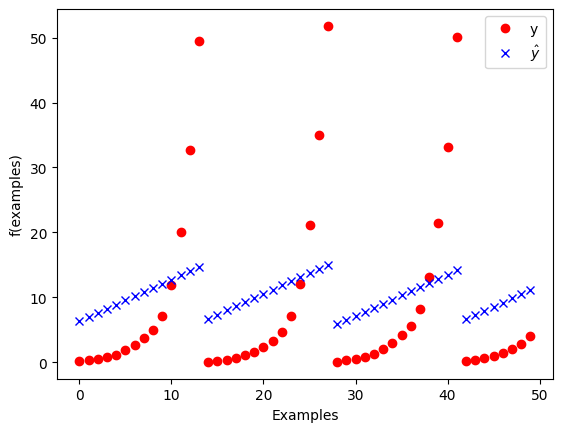

In [29]:
# Code sample that can be used to visualize the difference between the ground truth and the prediction
import matplotlib.pyplot as plt
num_samples_to_plot = 50
plt.plot(Y[0:num_samples_to_plot], 'ro', label='y')
yw = [h(w,x) for x in X]
plt.plot(yw[0:num_samples_to_plot], 'bx', label='$\hat{y}$')
plt.legend()
plt.xlabel("Examples")
plt.ylabel("f(examples)")





# Going further

The following are extensions of the work previously done. If attempting them **do not modify** the code you produced above so that it can be evaluated.

### Improvements to gradient descent

Consider improving the gradient descent with:

 - Stochastic Gradient Descent (SGD), which means selecting a subset of the examples for training
 - Detection of convergence to halt the algorithm before the maximum number of iterations


### Data normalization

Different input features can have different units, and very different ranges.
Within the perceptron computation, these values will be summed together.
While gradient descent is normally able to deal with this (by adapting the weights of the perceptron for each input feature), standardizing the input features usually eases the perceptron training, and can sometimes improve accuracy.




```python
from sklearn.preprocessing import StandardScaler
sc = StandardScaler(copy=True) 
X_normalized = sc.fit_transform(X)
```

Try applying a standard normalization to the input features (make sure that you keep a feature column that is always equal to 1). Is the convergence faster ? Try to quantify this speed-up. What about accuracy ?

## Conclusion
We have managed to develop and train our perceptron to fit linear regression models to the hydrodynamic performance curves from the dataset. We have observed the results of the fitting of the model with different learning speeds and number of iterations, and how this changed the outcome of the predictions of our perceptron.
